In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path = './ga/'
results = []

for d, sub_d, files in os.walk(path):
    for file in files:
        if file.endswith('.solution'):
            f_name = file.replace('.solution', '')
            with open(os.path.join(path, file), 'r') as f:
                data = [x.strip() for x in f.readlines()]
            with open(os.path.join('./tu-berlin/', f_name + '.complete.best'), 'r') as f:
                mb = [x.strip() for x in f.readlines()]
            
            times = []
            found = False

            for idx, gen in enumerate(data[3:]):
                g, t, c = gen.split('\t')
                times.append(float(t))
                if c in mb:
                    found = True
                    break
                                  
            runtime = sum(times) + sum([float(x.split('\t')[1]) for x in data[0:3]])
            results.append([f_name, f_name[9:13], runtime, found])   


In [3]:
df = pd.DataFrame(results)
df = df.drop([0], axis=1)
df = df.rename(columns={1: "F1 elections", 2: "runtime", 3: "label"})
df = df.sort_values(by=["F1 elections"])

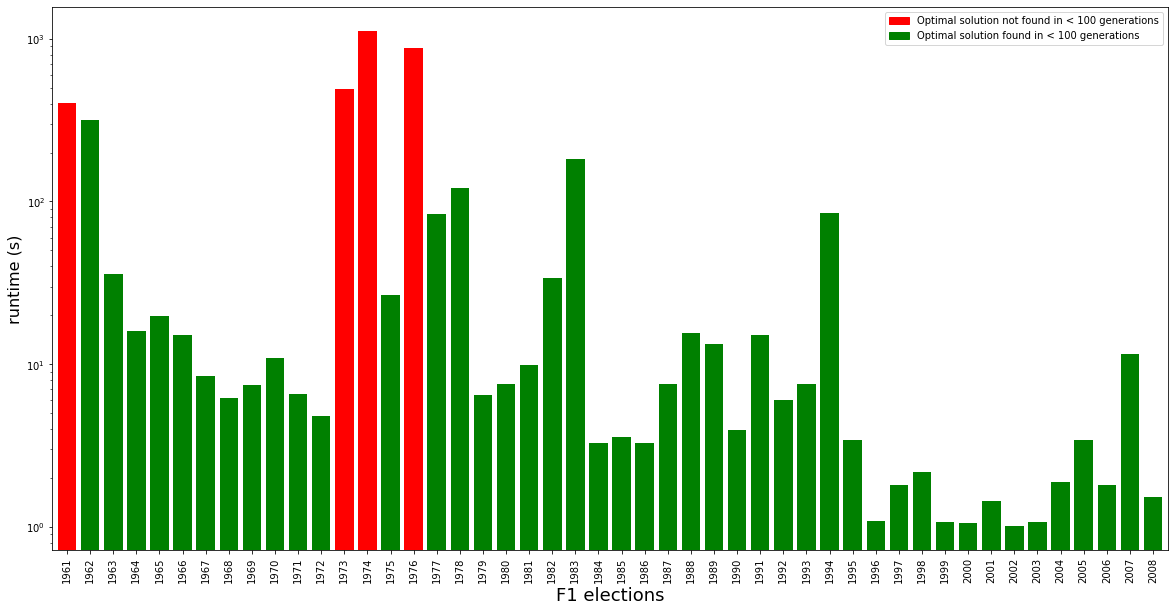

In [4]:
ax = df.plot.bar(x="F1 elections", y="runtime", figsize=(20,10), width=0.8, color=[np.where(df["label"]==False, 'r', 'g')][0])
plt.xlabel('F1 elections', fontsize=18)
plt.ylabel('runtime (s)', fontsize=16)
ax.set_yscale('log')
colors = {'Optimal solution not found in < 100 generations':'red', 'Optimal solution found in < 100 generations':'green'}   
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig('kemeny_elections.png')

In [5]:
with open('./ga/sport_F1_1969.election.solution', 'r') as f:
    data = [x.strip() for x in f.readlines()]

In [6]:
with open('./tu-berlin/sport_F1_1969.election.complete.best', 'r') as f:
    mb = [x.strip() for x in f.readlines()]

In [7]:
times = []
found = False

for idx, gen in enumerate(data[3:]):
    g, t, c = gen.split('\t')
    times.append(float(t))
    if c in mb:
        found = True
        break

print('found: ', found)
print(c)
print(g)
runtime = sum(times) + sum([float(x.split('\t')[1]) for x in data[0:3]])
print("runtime: {0:.4f}s".format(runtime))

found:  True
Jacky Ickx
Gen 0
runtime: 7.4450s
